In [3]:
import cv2
import os
import matplotlib.pyplot as plt
'''
image_path = './test/testimages'
images = []  
for filename in os.listdir(image_path):
    img = cv2.imread(os.path.join(image_path, filename))
    images.append(img)
'''

"\nimage_path = './test/testimages'\nimages = []  \nfor filename in os.listdir(image_path):\n    img = cv2.imread(os.path.join(image_path, filename))\n    images.append(img)\n"

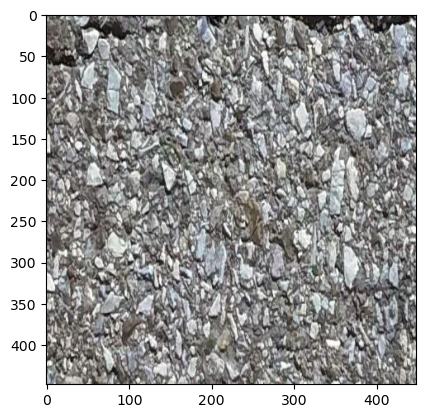

In [6]:
image = cv2.imread('./91.jpg')
plt.imshow(image)
plt.show()

This image is:  <class 'numpy.ndarray'> with dimensions: (448, 448, 3)


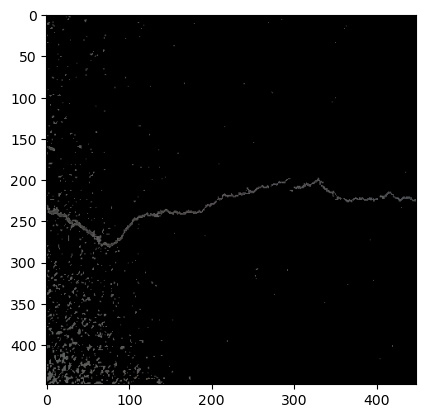

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
 
 

image = mpimg.imread('test.jpg')
print('This image is: ',type(image),           
         'with dimensions:', image.shape)       
 
 
ysize = image.shape[0]      
xsize = image.shape[1] 

color_select = np.copy(image)


red_threshold = 100
green_threshold = 100
blue_threshold = 100

rgb_threshold = [red_threshold, green_threshold, blue_threshold]
 
 
thresholds = (image[:,:,0] > rgb_threshold[0]) \
            | (image[:,:,1] > rgb_threshold[1]) \
            | (image[:,:,2] > rgb_threshold[2])
color_select[thresholds] = [0,0,0]    
 
 

plt.imshow(color_select)
plt.show()
 
 

# mpimg.imsave("color_select.png", color_select)

Canny

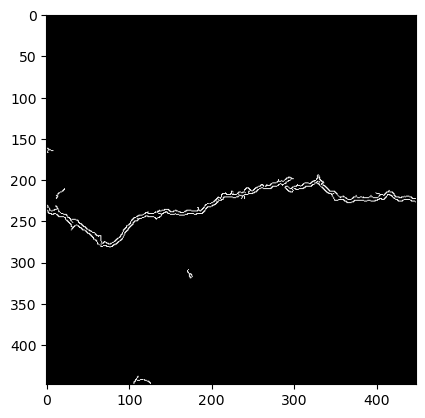

In [1]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
 

image = mpimg.imread('test.jpg')
gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
 

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray_img,(kernel_size, kernel_size), 0)
 

low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
 

plt.imshow(edges, cmap='Greys_r')

#mpimg.imsave("Canny.png", edges)


hough

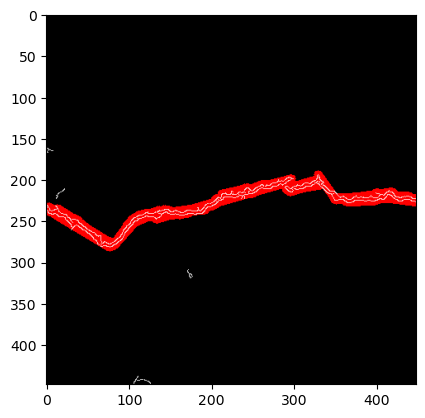

In [9]:

rho = 2 
theta = np.pi/180 
threshold = 15     
min_line_length = 30 
max_line_gap = 20    
line_image = np.copy(image)*0 
 
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)
 
 
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

color_edges = np.dstack((edges, edges, edges)) 
 
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
 
plt.imshow(lines_edges)
plt.show()
 
 
mpimg.imsave("hough.png", lines_edges)

In [10]:
np.unique(lines_edges)

array([  0, 204, 255], dtype=uint8)

In [11]:
lines_edges_new = np.array(lines_edges)
_, lines_edges_new = cv2.threshold(lines_edges_new, 127, 255, cv2.THRESH_BINARY)

In [12]:
np.unique(lines_edges_new)

array([  0, 255], dtype=uint8)

In [13]:
image = cv2.imread('mask.jpg')

In [14]:
mask_np = np.array(image)
mask_np.shape

(448, 448, 3)

In [15]:
mask = np.array(image)
_, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

In [16]:
np.unique(mask)

array([  0, 255], dtype=uint8)

In [17]:
def dice_coef_metric(pred, label):
    intersection = 2.0 * (pred * label).sum()
    union = pred.sum() + label.sum()
    
    if pred.sum() == 0 and label.sum() == 0:
        return 1
    return intersection / union

In [18]:
score = dice_coef_metric(lines_edges_new/255, mask/255)
score

0.4401290957825064